## Task 1:Importing Libraries

In [79]:
import pandas as pd #used for data handling
import numpy as np #used for numerical operations
import matplotlib.pyplot as plt # used for plots
import seaborn as sns #used for advanced plots

## Task 2: Reading and Exploration
- ### Subtask 2.1: Import dataset and read

In [80]:
titanic=pd.read_csv("Titanic-Dataset.csv") #loading the csv file
print("Dataset Shape:",titanic.shape) #shows shape (rows,columns)
titanic.head() #display first 5 rows


Dataset Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- ### Subtask 2.2: Overview of dataframe


  Go through columns,shapes,data types etc.

In [81]:
titanic.info() #checks for Column names,missing values,datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Dataset Overview
- The dataset has **891 passengers** and **12 columns**.
- **Target column**: Survived (0 = not survived, 1 = survived).
- **Numerical columns**: Age, Fare, SibSp, Parch, Pclass.
- **Categorical columns**: Sex, Embarked, Cabin, Ticket, Name.
- **Missing data**:
       - Age → ~20% missing
       - Cabin → ~77% missing
       - Embarked → 2 values missing
#### Note:
Most data is complete, but Age and Cabin need special handling before modeling.


In [82]:
titanic.describe() #summary statistics for numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Dataset Statistics
- **Survival rate**: Only **38% passengers survived**.
- **Passenger class**: Average is 2.3 → most were in **3rd class**.
- **Age**: Average age is ~**30 years**, youngest is **0.4 years** (infant),oldest is **80 years**.
- **Family aboard**:
       - **SibSp (siblings/spouses)** → Most had 0 (no siblings/spouse). Max = 8.
     - **Parch (parents/children)** → Most had 0. Max = 6.
- **Fare**: Very skewed.
     - Median = **14.45**,but max = **512** (few passengers paid extremely high fares).
#### Note:
Most passengers were young adults traveling alone, many in 3rd class, and only about one-third survived.

###

## Task 3: Exploratory Data Analysis (EDA)
- ### Subtask 3.1: Check missing values


In [83]:
titanic.isna().sum() #for checking the sum of total missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Note:
The Dataset has missing values mainly in Age (177) and Cabin (687), with just 2 in Embarked. Age has moderate missing values,so it should be imputed carefully (possibly based on class and gender). Cabin has very high missing values,so its better to drop it,unless we extract deck information. Embarked has only 2 missing values,so filling with the most frequent category makes sense. 

- ### Subtask 3.2: Exploring Patterns Between Features & Survival

#### 1. Overall Survival Distribution.

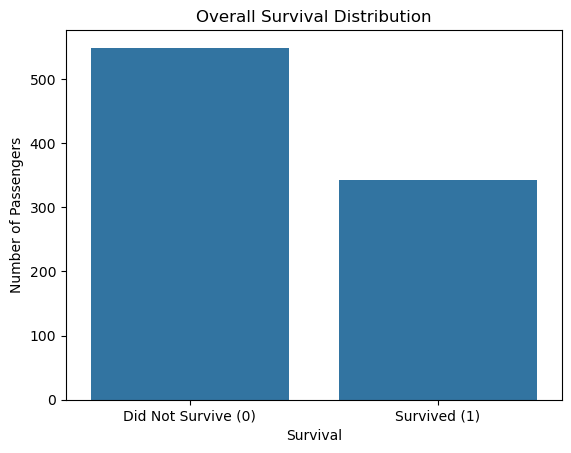

In [84]:
sns.countplot(x="Survived",data=titanic) # Bar chart
plt.xticks([0,1],["Did Not Survive (0)","Survived (1)"]) #to change default tick labels
plt.xlabel("Survival")
plt.ylabel("Number of Passengers")
plt.title("Overall Survival Distribution")
plt.show()

#### Note:
- *Out of 891 passengers,about 550 did not suevive and only 340 survived.*
- *This means around 62% perished, while 38% survived.*
- *The data is inbalanced (more deaths than survivors).*
  
   We have to carefully analyze which factors gave certain passengers a better chance of survival.

#### 2. Survival by Sex.
*As Gender played a huge role in survival (the "women & children first" rule).*

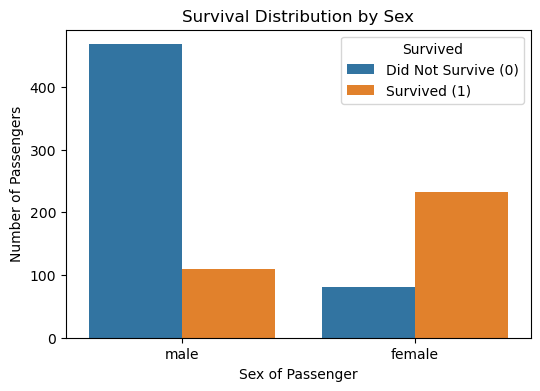

In [85]:
plt.figure(figsize=(6,4)) #set figure size
sns.countplot(x="Sex",hue="Survived",data=titanic)
# labels and title
plt.title("Survival Distribution by Sex")
plt.xlabel("Sex of Passenger")
plt.ylabel("Number of Passengers")
# legends (0 = Did Not Survive, 1 = Survived)
plt.legend(title="Survived",labels=["Did Not Survive (0)","Survived (1)"])
plt.show()

#### Note:
- *Female passengers had a **much higher survival rate** compared to males,**74% of females survived** (233 out of 314).*
- *Most **males did not survive**,while a majority of **females survived** .*
- *This reflects the **"women and children first"** evacuation policy followed during the disaster*

 Most male passengers (about 81%) perished, with only 19% surviving.
In contrast, the majority of female passengers (about 74%, or roughly 3 out of 4) survived, while only 26% did not.

#### 3. Survival by Passenger Class (Pclass).
*As class had a huge influence on survival chances (1st class had better access to lifeboats compared to 3rd class).*


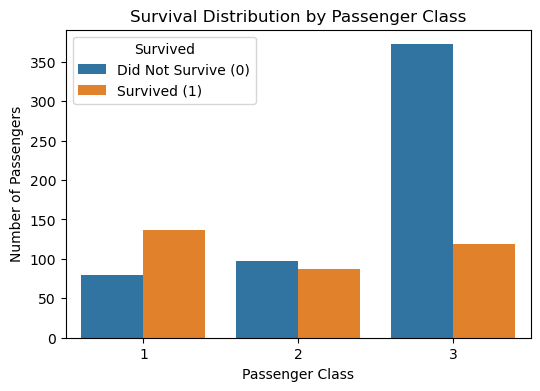

In [86]:
plt.figure(figsize=(6,4)) # set figure size
# Countplot to show the distribution of passengers across classes.
# separated by survival status
sns.countplot(x="Pclass",hue="Survived",data=titanic)
plt.title("Survival Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived",labels=["Did Not Survive (0)","Survived (1)"])
plt.show()

#### Note:
- **1st Class (High Socio-Economic Status)**
  - About **63% survived**(almost 2 out of 3).
  - Only **37% did not survive**.
  - &rarr; First-class passengers had the **highest survival rate**.
- **2nd Class (Middle Class)**
  - About **48% survived**.
  - About **52% did not survive**.
  - &rarr; Second-class passengers had a **moderate chance of survival**.
- **3rd Class (Lower Socio-Economic Status)**
  - About **25% survived**.
  - About **75% did not survive**.
  - &rarr; Third-class passengers had the **lowest survival rate**.

Passenger class strongly influenced survival chances. Wealthier passengers (1st Class) were prioritized and had better access to lifeboats, while poorer passengers (3rd Class) suffered the most.





#### 4. Survival by Age.
*As "women and children first" rule is followed. So,checking survival patterns across different age groups will give a effective influence.*
##### 4.1: Overall Age Distribution.
Shows general spread of passengers’ ages on Titanic.

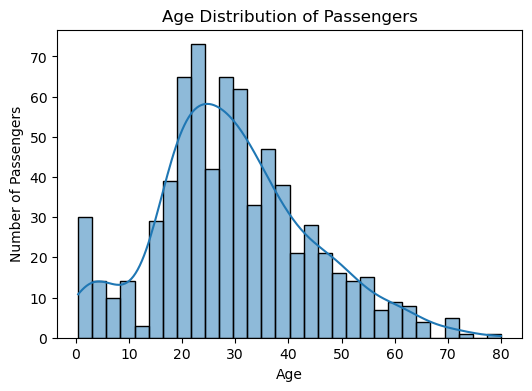

In [87]:
plt.figure(figsize=(6,4))
sns.histplot(titanic["Age"].dropna(),bins=30,kde=True) # Histogram + KDE (Kernel Density Estimation) curve.
plt.title("Age Distribution of Passengers")
plt.xlabel("Age") 
plt.ylabel("Number of Passengers")
plt.show()

#### Note:
- *The Titanic carried mostly **young adults**, particularly in their **20s and 30s**.*
- *Children **(below 10) and elderly (above 60)** formed a much **smaller group***.
- *This distribution shows the **working-age group** (20-40 years) dominated the passenger list, possibly due to **migration, jobs, or travel**.*
- *Since there were **fewer children on board**,and they were given **priority in rescue**, their survival rate may look higher when we check survival later*.
  

##### 4.2: Age vs Survival.
Compares survival chances across age groups, helps in checking if children/young had better chances.

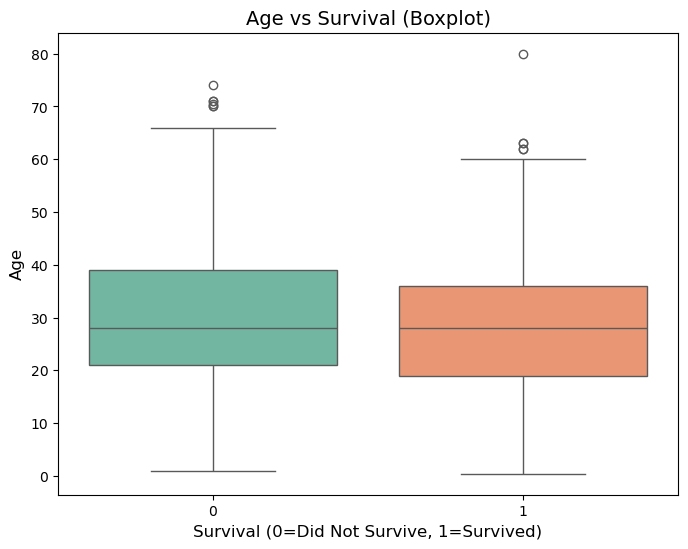

In [88]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived',y='Age',data=titanic,hue='Survived',palette="Set2",legend=False)

plt.title("Age vs Survival (Boxplot)",fontsize=14)
plt.xlabel("Survival (0=Did Not Survive, 1=Survived)",fontsize=12)
plt.ylabel("Age",fontsize=12)
plt.show()

#### Note:
- **Median ages**
 &rarr; *Both survivors and non-survivors had a median age of about **28 years**, showing that **age alone was not a strong deciding factor** for survival.*
- **Age Spread**
 &rarr; *Both groups included **children, young adults, and elderly** passengers. Survival was not limited to any single age group.*
- **Outliers**
 &rarr; *Some **very old passengers** (70-80 years) survived, while some did not. This shows that **survival was possible at any age,** even though elderly were fewer.*
- **Tendency**
 &rarr; *Survivors had a **slightly higher concentration of younger passengers** compared to non-survivors, which may reflect the "women and children first" evacuation policy.*

#### 5. Survival by Embarked (Port of Boarding).
*These ports had passengers from **different social and economic background**, so survival chances may differ.*
- *Passengers boarded Titanic from **3 main ports:***
  - **C = Cherbourg (France)**
  - **Q = Queenstown (Ireland)**
  - **S = Southampton (England)**

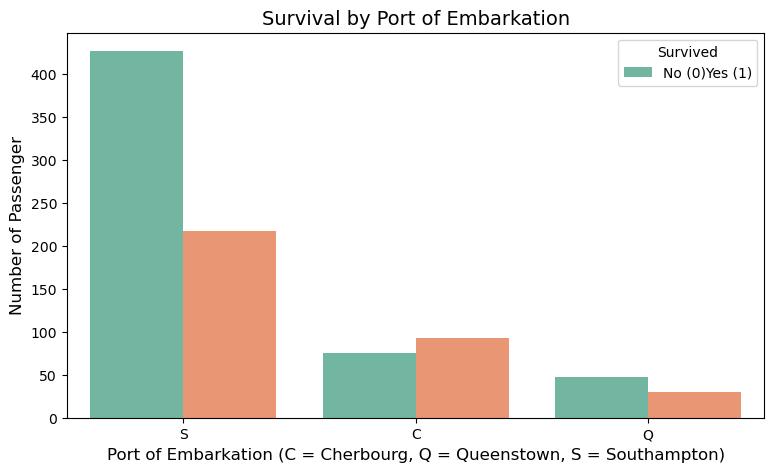

In [89]:
plt.figure(figsize=(9,5))
# Countplot: shows passenger counts by Embarked,splitting by survival status 
sns.countplot(x="Embarked", hue="Survived", data=titanic, palette="Set2")

plt.title("Survival by Port of Embarkation",fontsize=14)
plt.xlabel("Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)",fontsize=12)
plt.ylabel("Number of Passenger",fontsize=12)
plt.legend(title="Survived", labels=["No (0)" "Yes (1)"])
plt.show()

#### Note:
- **Southampton (S)**&rarr; *Majority of passengers boarded here. Most of them did **not survive**.*
  - *Survival rate here is low (~33%).*
  - *Likely because many 3rd class passengers boarded at Southampton.*
- **Cherbourg (C)**&rarr; *Passengers from Cherbourg had a **higher survival rate (~55-60%)**.*
  - *This group had more **1st class passengers**, which gave them better access to lifeboats.*
- **Queenstown (Q)**&rarr; *Very few passengers boarded here, but survival chances were quite low (~38%)*
  - *Similar to Southampton, mostly 3rd class passengers.*

*Boarding of the ship also indirectly affected the survival chances, because **port of embarkation was linked to passenger class** (wealthier passengers often boarded from Cherbourg).*

#### 6. Survival by Fare.
 To check if passengers who paid higher ticket prices had better chances of survival. Fare will give us a more detailed view than the Pclass, which will help us see the impact of economic status on survival.

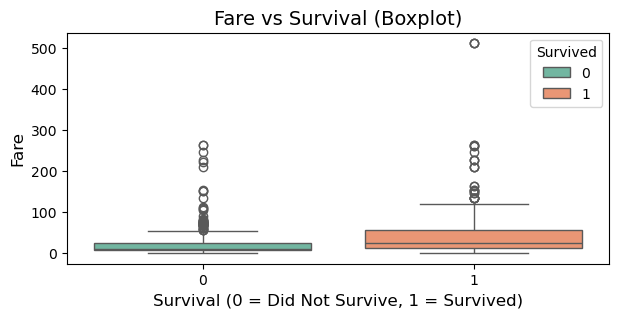

In [90]:
plt.figure(figsize=(7,3))
sns.boxplot(x="Survived", y="Fare", data=titanic, hue="Survived", palette="Set2")

plt.title("Fare vs Survival (Boxplot)", fontsize=14)
plt.xlabel("Survival (0 = Did Not Survive, 1 = Survived)", fontsize=12)
plt.ylabel("Fare", fontsize=12)
plt.show()


#### Note:
- *The **median fare** of survivors is clearly higher than that of non-survivors.*
- *Most **non-survivors paid low fares** (indicating 3rd class), while many survivors paid **higher fares** (1st class).*
- *Passengers with **expensive tickets (outliers above 200–500)** were far more likely to survive.*
- *This shows a strong link between **wealth and survival** &rarr; wealthier passengers had a much better chance of getting access to lifeboats.*
- *Survival on the Titanic was influenced not just by chance, but also by **economic inequality.***

## Task 4: Feature Engineering
### Subtask 4.1: Create Family Size Feature

In [91]:
# Create a new feature "FamilySize"
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"] + 1 # +1 for self
#Check 1st 5 values
titanic[["SibSp","Parch","FamilySize"]].head()

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


#### Subtask 4.1.1: Survival by Family Size- Countplot

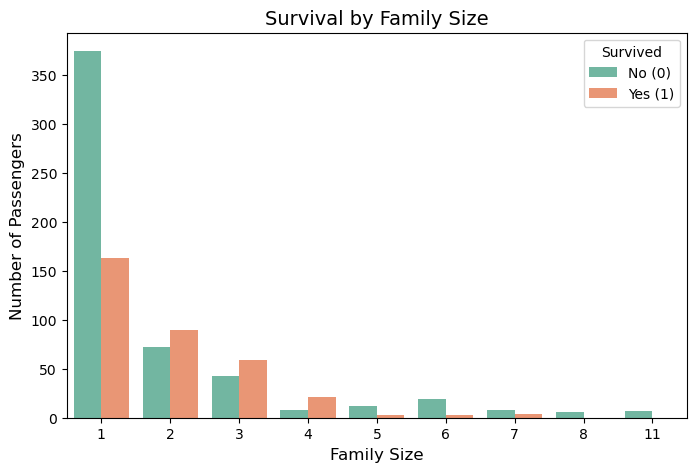

In [92]:
plt.figure(figsize=(8,5))
#countplot of FamilySize vs Survival
sns.countplot(x="FamilySize", hue="Survived", data=titanic, palette="Set2")

plt.title("Survival by Family Size", fontsize=14)
plt.xlabel("Family Size", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)
plt.legend(title="Survived", labels=["No (0)", "Yes (1)"])
plt.show()

#### Note:
**1. Solo Travellers (FamilySize = 1)**
 - *Made up the largest group on the Titanic.*
 - **Most did not survive**-*suggesting traveling alone was a big disadvantage.*
 - *Possible reason: nobody to support or prioritize them during the evacuation.*

**2. Small Families (2–4 members)**
 - *Had the **highest survival chances**.*
 - *Families could stay together, help each other, and ensure children/women got priority in lifeboats.*
 - *This was the **safest group to belong to**.*

**3. Large Families(&ge; 5 members)**
- *Rare group, but survival rates dropped sharply.*
- *Likely because coordinating evacuation for many members was difficult.*
- *Example: Parents might not leave without children, leading to delayed escape.*

**Overall Pattern-"U-Shaped Relationship"**
- *Survival was **lowest** for **solo passengers** and **very large families**.*
- *Survival was **highest** for **small-to-medium families** (2–4).*
- *This shows that **social support mattered** – but only up to a point. Too many dependents reduced survival odds.*

## Task 5: Correlation Analysis (EDA)
It will help us to understand how different numerical features **(like Age, Fare, SipSp, Parch, and FamilySize)** are related to **Survival**. It tells us which factors had the strongest influence on survival and guides us in selecting meaningful features for predictive modeling.

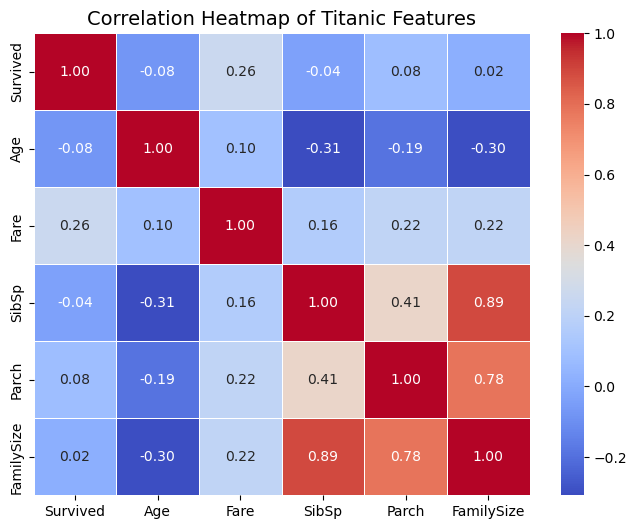

In [93]:
# Correlation Heatmap for Numerical Features
# Only numeric columns
numeric_features = ["Survived","Age","Fare","SibSp","Parch","FamilySize"]
# Calculate correlation matrix
corr = titanic[numeric_features].corr()
# Plot Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Correlation Heatmap of Titanic Features", fontsize=14)
plt.show()

#### Note:
- **Fare (0.26) vs Survival** &rarr; *Weak but clear positive correlation.*

  &rarr; *Passengers who paid higher fares (wealthier, often in 1st class) had better chances of survival.*
- **Age (-0.08) vs Survival** &rarr; *Almost no correlation.*

  &rarr; *Age alone did not play a major role in deciding survival.*
- **SibSp (-0.04) & FamilySize (0.02) vs Survival** &rarr; *Very weak correlation.*

  &rarr; *Having family on board didn’t strongly affect chances of survival.*
- **Parch (0.08) vs Survival** &rarr; *Slight positive correlation.*

  &rarr; *Having parents/children on board gave a small survival advantage, but not very significant.*
- **Strong correlations within features:**
  - **FamilySize & SibSp (0.89), FamilySize & Parch (0.78)** &rarr; *Very high correlation since FamilySize was engineered from SibSp + Parch.*

  - **SibSp & Parch (0.41)** &rarr; *Moderate correlation (families often traveled together).*
 
Among numerical features, Fare showed the strongest link with survival. Age and family-related variables had little direct impact, so they might need to be combined with other features for better prediction.

## Task 6: Data Preprocessing
### Subtask 6.1: Handling Missing Values
- **Age** &rarr; 177 missing &rarr; fill with **median.**
- **Embarked** &rarr; 2 missing &rarr; fill with **most common (mode).**
- **Cabin** &rarr; to many missing &rarr; drop, but before dropping, create a new feature **HasCabin (0/1).**

In [108]:
# Fill missing Age with median
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

# Fill missing Embarked with mode (most frequent value)
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])

# Create a new binary feature: HasCabin (1 = Cabin info present, 0 = missing)
# Drop Cabin (too many missing values, not directly useful)
if "Cabin" in titanic.columns:
    titanic["HasCabin"] = titanic["Cabin"].notnull().astype(int)
    titanic.drop("Cabin", axis=1, inplace=True)

####

- *Filled missing **Age** values &rarr; with the **median***. 
- *Filled missing **Embarked** values &rarr; with the **most frequent port (mode)***.  
- *Dropped **Cabin** column &rarr; too many missing values.*  
- *Created new feature **HasCabin** &rarr; `1` if cabin info present, `0` otherwise.*  
- *Created new feature **FamilySize** &rarr; `SibSp + Parch + 1` (captures family members traveling together).*  

&rarr; *Now, the dataset has **no missing values** and includes **useful engineered features** for better modeling.*



In [115]:
print(titanic.head()) # Prints updates dataset

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  FamilySize  HasCabin  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500           2         0       False        True  
1          PC 17599  71.2833           2         1       False       False  
2  STON/O2. 3101282   7.9250           1         0       False   

## Task 7: Encode Categorical Variables.


In [116]:
from sklearn.preprocessing import LabelEncoder

In [118]:
# Encode 'Sex' (male/female → 0/1)
label_encoder = LabelEncoder()
titanic["Sex"] = label_encoder.fit_transform(titanic["Sex"])

# Only encode 'Embarked' if it still exists as a column
if "Embarked" in titanic.columns:
    titanic = pd.get_dummies(titanic, columns=["Embarked"], drop_first=True)

print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  FamilySize  HasCabin  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500           2         0       False        True  
1          PC 17599  71.2833           2         1       False       False  
2  STON/O2. 3101282   7.9250           1         0       False   

## Task 8: Feature Selection

In [127]:
# Define target 
y= titanic['Survived']

# Select features explicitly (exclude PassengerId, Name, Ticket, Survived).
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
            'Fare', 'FamilySize', 'HasCabin',
            'Embarked_Q', 'Embarked_S']]
print(x.head())
print(y.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  FamilySize  HasCabin  Embarked_Q  \
0       3    1  22.0      1      0   7.2500           2         0       False   
1       1    0  38.0      1      0  71.2833           2         1       False   
2       3    0  26.0      0      0   7.9250           1         0       False   
3       1    0  35.0      1      0  53.1000           2         1       False   
4       3    1  35.0      0      0   8.0500           1         0       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


#### Note:

- **At this stage, we have already**:
 - Handled missing values (`Age`, `Embarked`, `Cabin`)
 - Encoded categorical features (`Sex`, `Embarked`)
 - Created new features (`FamilySize`, `HasCabin`)

Now we prepare the dataset for modeling by splitting it into:

- **Target variable (`y`)**  
  `Survived` &rarr; what we want to predict (0 = did not survive, 1 = survived)

- **Feature variables (`X`)**  
  Selected useful columns:
  - `Pclass` &rarr; Passenger’s travel class (1, 2, or 3)
  - `Sex` &rarr; Encoded as 0/1
  - `Age` &rarr; Passenger age (missing values filled with median)
  - `SibSp` &rarr; Number of siblings/spouses aboard
  - `Parch` &rarr; Number of parents/children aboard
  - `Fare` &rarr; Ticket fare
  - `FamilySize` &rarr; Engineered feature = `SibSp + Parch + 1`
  - `HasCabin` &rarr; 1 if cabin info is available, else 0
  - `Embarked_Q`, `Embarked_S` &rarr; Dummy variables for embarkation port (baseline is `Embarked_C`)

- **We exclude**:
 - `PassengerId` &rarr; Only an identifier, not useful
 - `Name` &rarr; Text data, not directly predictive (can be used later for extracting titles)
 - `Ticket` &rarr; Random strings, not predictive
 - `Survived` &rarr; Target variable, cannot be part of features

- **After this step**:  
 - `X` = cleaned & engineered features (independent variables)  
 - `y` = survival outcome (dependent variable)


## Task 9: Train-Test Split and Baseline Logistic Regression

To evaluate model performance, we split the dataset into training and testing sets.  
We will be using **Logistic Regression** as the first baseline model since it is simple, interpretable, and effective for binary classification tasks like Titanic survival prediction.


In [128]:
# 1) tools we'll use: split data, scale features, build a logistic model,
# chain steps, and score it
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [130]:
# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Create a pipeline: Standardize features &rarr; Logistic Regression
log_reg_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Train the model
log_reg_model.fit(X_train, y_train)

#Predict on test set
y_pred = log_reg_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Clssification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8156424581005587

 Clssification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179


 Confusion Matrix:
 [[97 13]
 [20 49]]


## Model Evaluation: Logistic Regression

The baseline Logistic Regression model achieved an **accuracy of ~82%** on the test set.  
However, looking beyond accuracy gives more meaningful insights:

- **Class 0 (Did not survive):**  
  High precision (0.83) and recall (0.88), meaning the model is very reliable at identifying passengers who did not survive.

- **Class 1 (Survived):**  
  Precision of 0.79 and recall of 0.71, showing the model is somewhat weaker at identifying survivors, often predicting "died" when the passenger actually survived.

### Confusion Matrix Interpretation
- **97 passengers** correctly identified as non-survivors.  
- **49 passengers** correctly identified as survivors.  
- **13 passengers** incorrectly predicted as survivors (actually died).  
- **20 passengers** incorrectly predicted as non-survivors (actually survived).  

**Insight:** The model is conservative — it predicts “died” more confidently than “survived.”  
It catches most non-survivors but misses a notable fraction of actual survivors.


### Task 9.1: Confusion Matrix Plot

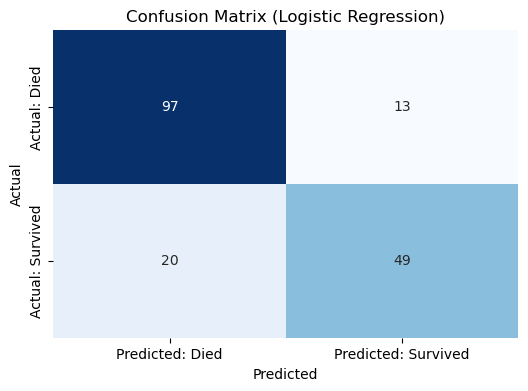

In [132]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted: Died", "Predicted: Survived"],
            yticklabels=["Actual: Died", "Actual: Survived"])

plt.title("Confusion Matrix (Logistic Regression)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

#### Note:
- Darker squares = more passengers in that category.  
- Top-left → correctly predicted **Died**.  
- Bottom-right → correctly predicted **Survived**.  
- Off-diagonal → mistakes (false predictions).

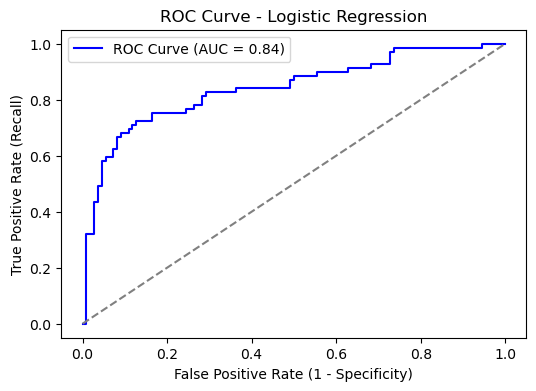

In [133]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (survived = 1)
y_prob = log_reg_model.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # diagonal line (random guess)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


### New Concept Learned: ROC Curve & AUC
While working on this project, I explored a new concept — the **ROC Curve and AUC score**.  
- The ROC curve helps visualize how well the model separates the two classes (survived vs not survived).  
- The AUC score gives a single number summary: higher values mean better separation.  

This was my first time learning and applying this evaluation method, and it gave me deeper insight into model performance beyond just accuracy.


## Conclusion

- Built a Logistic Regression model for Titanic survival prediction.  
- Achieved ~82% accuracy on the test set.  
- Learned new concepts like handling missing values, encoding categorical features, and evaluating with ROC-AUC.  

### Next Steps (for future work):  
- Explore advanced models (Decision Trees, Random Forest, XGBoost).  
- Compare performance across models.  

This marks a good checkpoint — I will push this project to GitHub now, and revisit it later to extend with more models.
